<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/MLP_Circuits_Mathematical_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLP CIRCUITS: MATHEMATICAL PLAYGROUND

Interactive exploration of the mathematics in 'The Single Switch'


PART 1: ACTIVATION FUNCTIONS
✓ Saved: activation_functions.png


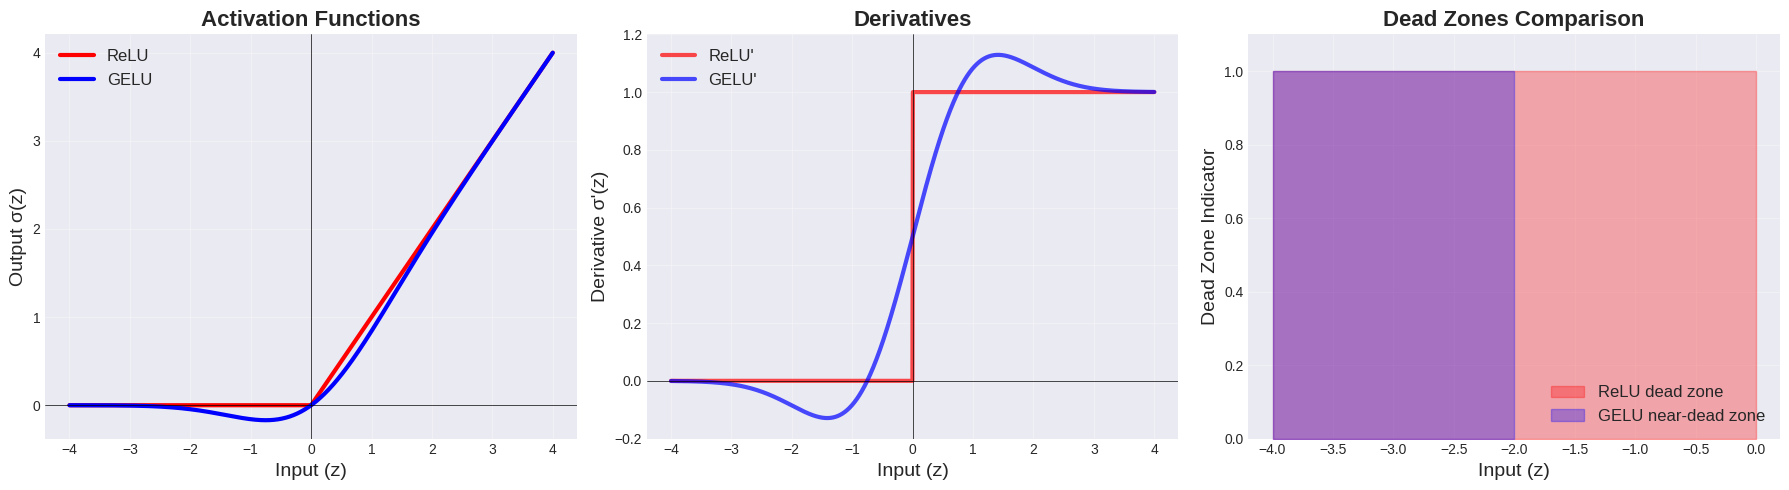


PART 2: SPARSITY IN MLP ACTIVATIONS

✓ Saved: sparsity_demonstration.png
  - Sparsity: 84.5%
  - Active neurons: 475 / 3072


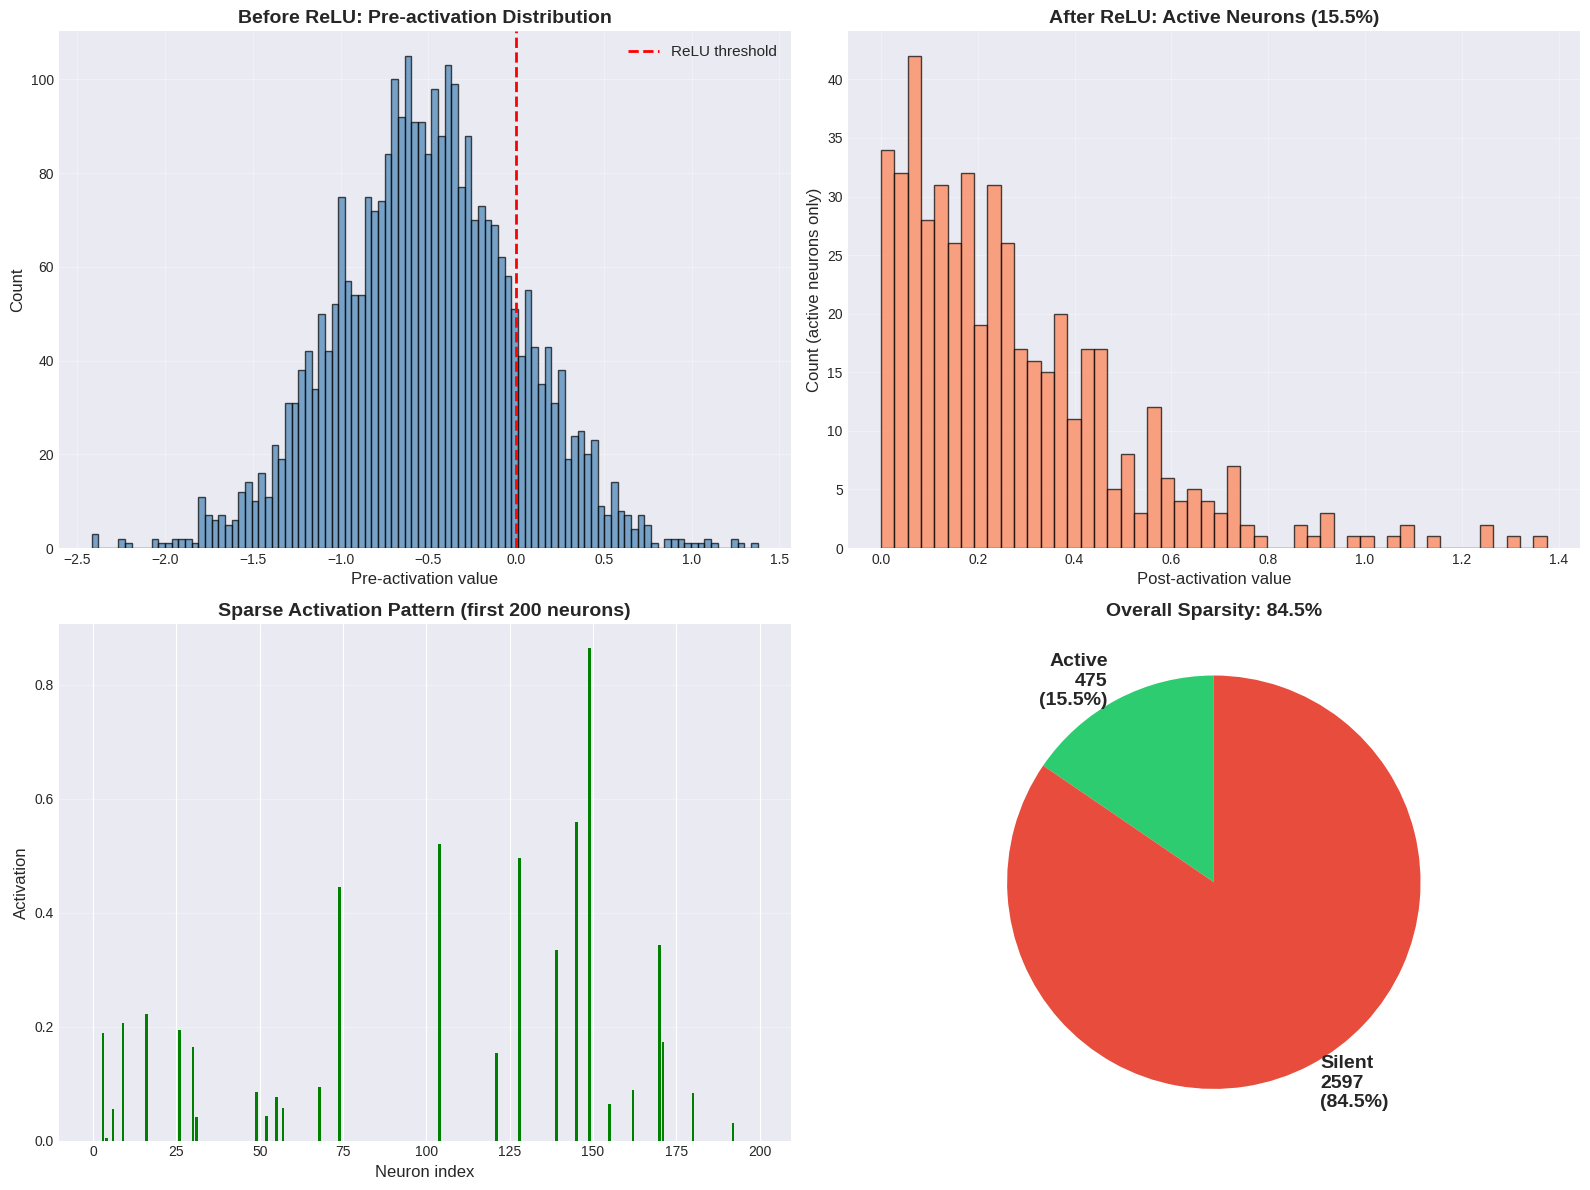


PART 3: CONCEPT DETECTION

✓ Saved: concept_detection.png


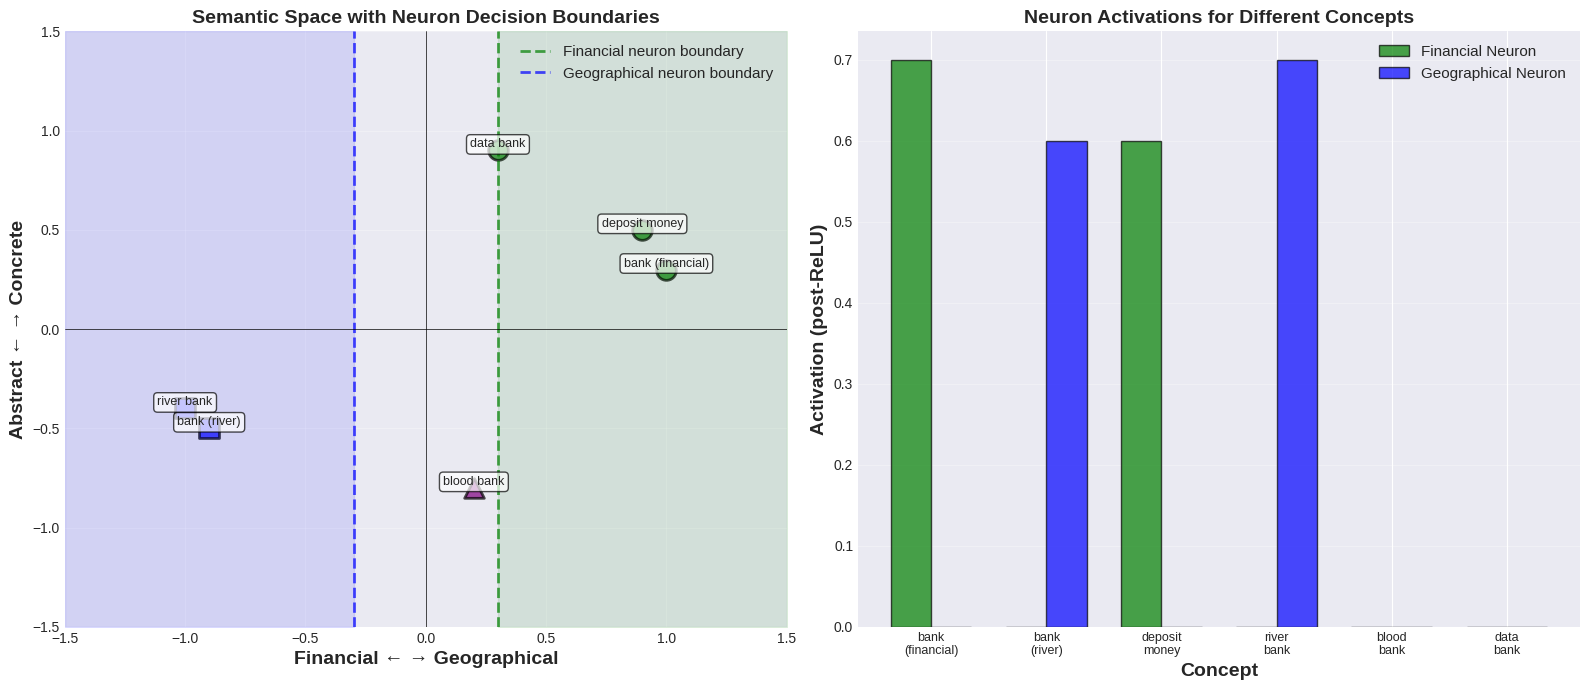


PART 4: INFORMATION BOTTLENECK

✓ Saved: information_bottleneck.png
  - At 85% sparsity: ~368 active neurons
  - Information compression: ~0.0%


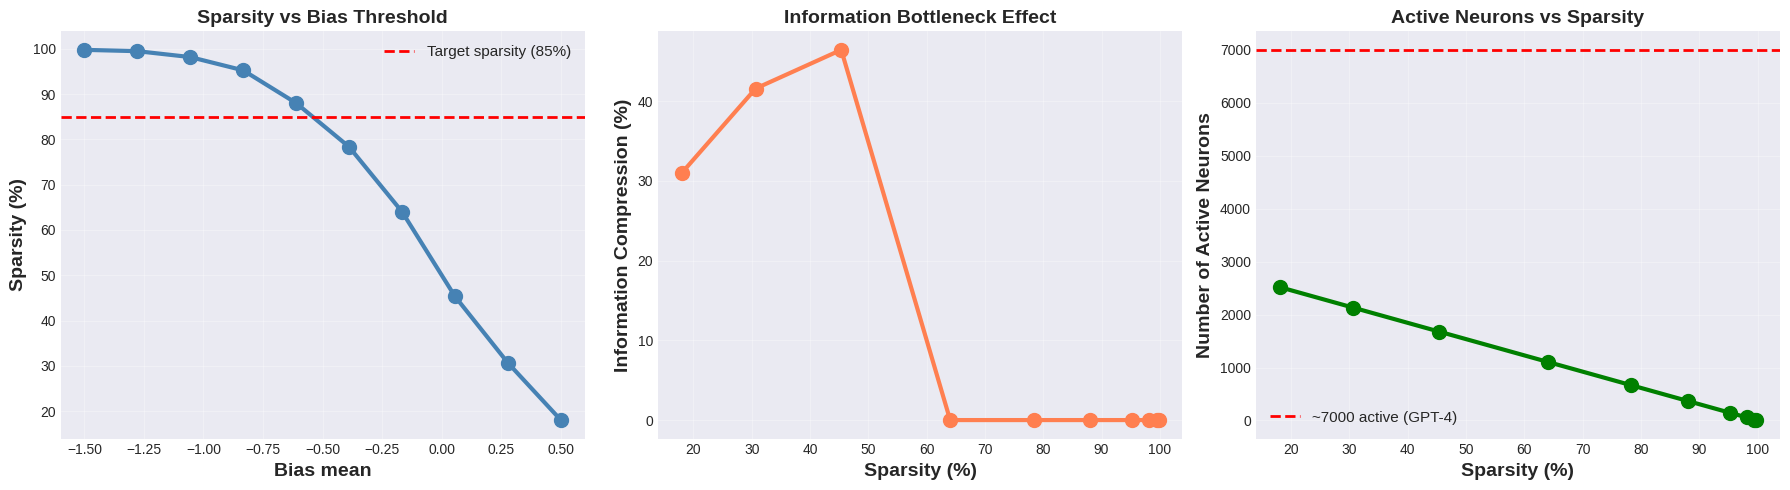


PART 5: LAYER HIERARCHY

✓ Saved: layer_hierarchy.png
  - Reasoning threshold crossed at layer: 41


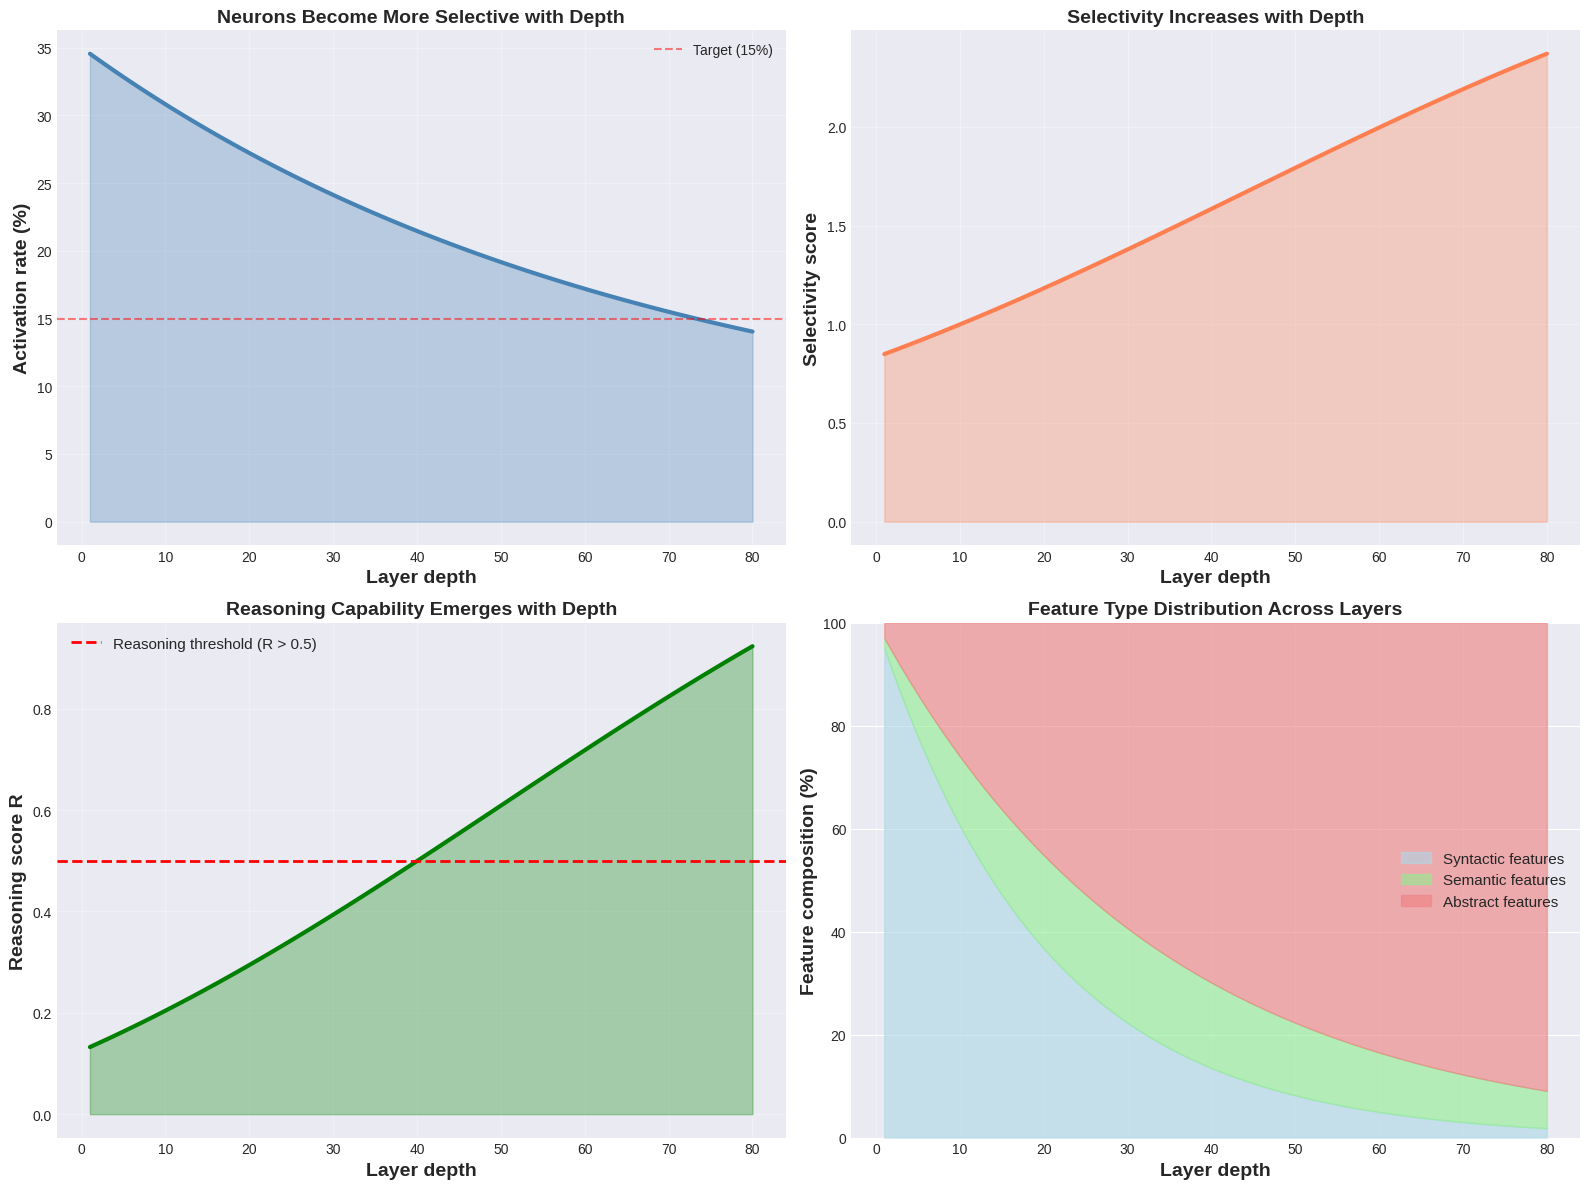


INTERACTIVE EXPLORATION

Example 1: Strong positive signal, negative bias

ReLU Activation:
  Input signal: 2.50
  Bias: -0.50
  Pre-activation (z): 2.00
  Post-activation (h): 2.00
  Status: 🟢 ACTIVE

Example 2: Weak signal, negative bias

ReLU Activation:
  Input signal: 0.30
  Bias: -0.50
  Pre-activation (z): -0.20
  Post-activation (h): 0.00
  Status: 🔴 SILENT

Example 3: Negative signal (always silent with ReLU)

ReLU Activation:
  Input signal: -1.50
  Bias: -0.50
  Pre-activation (z): -2.00
  Post-activation (h): 0.00
  Status: 🔴 SILENT

Example 4: Same negative signal with GELU (not completely silent)

GELU Activation:
  Input signal: -1.50
  Bias: -0.50
  Pre-activation (z): -2.00
  Post-activation (h): -0.05
  Status: 🔴 SILENT

SUMMARY

Key Insights from Mathematical Exploration:

1. THE KINK MATTERS
   • ReLU creates a sharp decision boundary at zero
   • GELU smooths this boundary for training stability
   • The kink transforms continuous → discrete

2. SPARSITY IS INTENT

In [4]:

# Companion notebook to "The Single Switch" article
# Author: DrSwarnenduAI

"""
This notebook lets you explore the mathematical concepts from the article:
1. ReLU activation and sparsity
2. Neuron activation patterns
3. Concept detection
4. Information bottleneck
5. Layer-wise specialization
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("MLP CIRCUITS: MATHEMATICAL PLAYGROUND")
print("=" * 80)
print("\nInteractive exploration of the mathematics in 'The Single Switch'\n")

# ============================================================================
# PART 1: ReLU vs GELU - The Activation Functions
# ============================================================================

def relu(x):
    """ReLU: max(0, x)"""
    return np.maximum(0, x)

def gelu(x):
    """GELU: x * Φ(x) where Φ is cumulative normal"""
    return x * norm.cdf(x)

def plot_activation_functions():
    """Compare ReLU and GELU"""
    x = np.linspace(-4, 4, 1000)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot 1: Activation functions
    axes[0].plot(x, relu(x), 'r-', linewidth=3, label='ReLU')
    axes[0].plot(x, gelu(x), 'b-', linewidth=3, label='GELU')
    axes[0].axhline(0, color='k', linewidth=0.5)
    axes[0].axvline(0, color='k', linewidth=0.5)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlabel('Input (z)', fontsize=14)
    axes[0].set_ylabel('Output σ(z)', fontsize=14)
    axes[0].set_title('Activation Functions', fontsize=16, fontweight='bold')
    axes[0].legend(fontsize=12)

    # Plot 2: Derivatives
    # ReLU derivative
    relu_deriv = np.where(x > 0, 1, 0)
    # GELU derivative: Φ(x) + x*φ(x)
    gelu_deriv = norm.cdf(x) + x * norm.pdf(x)

    axes[1].plot(x, relu_deriv, 'r-', linewidth=3, label="ReLU'", alpha=0.7)
    axes[1].plot(x, gelu_deriv, 'b-', linewidth=3, label="GELU'", alpha=0.7)
    axes[1].axhline(0, color='k', linewidth=0.5)
    axes[1].axvline(0, color='k', linewidth=0.5)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlabel('Input (z)', fontsize=14)
    axes[1].set_ylabel("Derivative σ'(z)", fontsize=14)
    axes[1].set_title('Derivatives', fontsize=16, fontweight='bold')
    axes[1].legend(fontsize=12)
    axes[1].set_ylim(-0.2, 1.2)

    # Plot 3: Dead zone comparison
    axes[2].fill_between(x[x < 0], 0, 1, alpha=0.3, color='red', label='ReLU dead zone')
    axes[2].fill_between(x[x < -2], 0, 1, alpha=0.3, color='blue', label='GELU near-dead zone')
    axes[2].set_xlabel('Input (z)', fontsize=14)
    axes[2].set_ylabel('Dead Zone Indicator', fontsize=14)
    axes[2].set_title('Dead Zones Comparison', fontsize=16, fontweight='bold')
    axes[2].legend(fontsize=12)
    axes[2].set_ylim(0, 1.1)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('activation_functions.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: activation_functions.png")
    plt.show()

print("\n" + "=" * 80)
print("PART 1: ACTIVATION FUNCTIONS")
print("=" * 80)
plot_activation_functions()

# ============================================================================
# PART 2: Sparsity Demonstration
# ============================================================================

def simulate_mlp_layer(d_in=768, d_hidden=3072, activation='relu', bias_mean=-0.5):
    """
    Simulate one MLP layer to demonstrate sparsity

    Args:
        d_in: Input dimension
        d_hidden: Hidden dimension (expansion)
        activation: 'relu' or 'gelu'
        bias_mean: Mean of bias distribution (controls sparsity)
    """
    # Random input vector (normalized)
    x = np.random.randn(d_in)
    x = x / np.linalg.norm(x)

    # Random weight matrix
    W_up = np.random.randn(d_hidden, d_in) * 0.1
    b_up = np.random.randn(d_hidden) * 0.5 + bias_mean

    # Compute pre-activation
    h_raw = W_up @ x + b_up

    # Apply activation
    if activation == 'relu':
        h = relu(h_raw)
    else:
        h = gelu(h_raw)

    # Compute sparsity
    num_active = np.sum(h > 0.01)  # Count neurons with significant activation
    sparsity = 100 * (1 - num_active / d_hidden)

    return h_raw, h, sparsity

def plot_sparsity_demo():
    """Visualize sparsity in MLP activations"""
    # Run simulation
    h_raw, h, sparsity = simulate_mlp_layer(d_in=768, d_hidden=3072,
                                            activation='relu', bias_mean=-0.5)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Pre-activation distribution
    axes[0, 0].hist(h_raw, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='ReLU threshold')
    axes[0, 0].set_xlabel('Pre-activation value', fontsize=12)
    axes[0, 0].set_ylabel('Count', fontsize=12)
    axes[0, 0].set_title('Before ReLU: Pre-activation Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].legend(fontsize=11)
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Post-activation distribution
    axes[0, 1].hist(h[h > 0], bins=50, alpha=0.7, color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Post-activation value', fontsize=12)
    axes[0, 1].set_ylabel('Count (active neurons only)', fontsize=12)
    axes[0, 1].set_title(f'After ReLU: Active Neurons ({100-sparsity:.1f}%)',
                        fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Activation pattern (first 200 neurons)
    sample_size = 200
    axes[1, 0].bar(range(sample_size), h[:sample_size], color=['red' if v == 0 else 'green' for v in h[:sample_size]])
    axes[1, 0].set_xlabel('Neuron index', fontsize=12)
    axes[1, 0].set_ylabel('Activation', fontsize=12)
    axes[1, 0].set_title(f'Sparse Activation Pattern (first {sample_size} neurons)',
                        fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Plot 4: Sparsity summary
    num_active = np.sum(h > 0.01)
    num_silent = len(h) - num_active

    sizes = [num_active, num_silent]
    colors = ['#2ecc71', '#e74c3c']
    labels = [f'Active\n{num_active}\n({100-sparsity:.1f}%)',
              f'Silent\n{num_silent}\n({sparsity:.1f}%)']

    wedges, texts, autotexts = axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='',
                                                startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
    axes[1, 1].set_title(f'Overall Sparsity: {sparsity:.1f}%', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('sparsity_demonstration.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Saved: sparsity_demonstration.png")
    print(f"  - Sparsity: {sparsity:.1f}%")
    print(f"  - Active neurons: {num_active} / {len(h)}")
    plt.show()

print("\n" + "=" * 80)
print("PART 2: SPARSITY IN MLP ACTIVATIONS")
print("=" * 80)
plot_sparsity_demo()

# ============================================================================
# PART 3: Concept Detection - Simulating Specialized Neurons
# ============================================================================

def create_concept_detector(concept_direction, threshold=-0.5):
    """
    Create a neuron that detects a specific concept

    Args:
        concept_direction: Direction in semantic space (unit vector)
        threshold: Bias (activation threshold)

    Returns:
        weight, bias
    """
    return concept_direction, threshold

def plot_concept_detection():
    """Demonstrate how neurons detect concepts"""
    # Create a 2D semantic space for visualization
    # Axis 1: Financial <-> Geographical
    # Axis 2: Abstract <-> Concrete

    # Define concepts as points in 2D space
    concepts = {
        'bank (financial)': np.array([1.0, 0.3]),
        'bank (river)': np.array([-0.9, -0.5]),
        'deposit money': np.array([0.9, 0.5]),
        'river bank': np.array([-1.0, -0.4]),
        'blood bank': np.array([0.2, -0.8]),
        'data bank': np.array([0.3, 0.9]),
    }

    # Create two specialized neurons
    w_financial = np.array([1.0, 0.0])  # Detects financial concepts
    w_geographical = np.array([-1.0, 0.0])  # Detects geographical concepts

    bias_financial = -0.3
    bias_geographical = -0.3

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    # Plot 1: Semantic space with decision boundaries
    ax = axes[0]

    # Plot concepts
    for concept, pos in concepts.items():
        if 'financial' in concept or 'deposit' in concept or 'data' in concept:
            color = 'green'
            marker = 'o'
        elif 'river' in concept or 'geographical' in concept:
            color = 'blue'
            marker = 's'
        else:
            color = 'purple'
            marker = '^'

        ax.scatter(pos[0], pos[1], s=200, c=color, marker=marker, edgecolors='black', linewidths=2, alpha=0.7)
        ax.annotate(concept, pos, fontsize=9, ha='center', va='bottom',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

    # Draw decision boundaries
    x_line = np.linspace(-1.5, 1.5, 100)

    # Financial neuron boundary: w_financial · x + bias = 0
    # x1 * 1.0 + bias = 0 => x1 = -bias
    ax.axvline(-bias_financial, color='green', linestyle='--', linewidth=2,
              label=f'Financial neuron boundary', alpha=0.7)
    ax.fill_betweenx([-1.5, 1.5], -bias_financial, 1.5, alpha=0.1, color='green')

    # Geographical neuron boundary
    ax.axvline(bias_geographical, color='blue', linestyle='--', linewidth=2,
              label=f'Geographical neuron boundary', alpha=0.7)
    ax.fill_betweenx([-1.5, 1.5], -1.5, bias_geographical, alpha=0.1, color='blue')

    ax.set_xlabel('Financial ← → Geographical', fontsize=14, fontweight='bold')
    ax.set_ylabel('Abstract ← → Concrete', fontsize=14, fontweight='bold')
    ax.set_title('Semantic Space with Neuron Decision Boundaries', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)

    # Plot 2: Activation values for each concept
    ax = axes[1]

    activations_financial = []
    activations_geographical = []
    concept_names = []

    for concept, pos in concepts.items():
        # Compute activations
        z_fin = np.dot(w_financial, pos) + bias_financial
        z_geo = np.dot(w_geographical, pos) + bias_geographical

        h_fin = relu(z_fin)
        h_geo = relu(z_geo)

        activations_financial.append(h_fin)
        activations_geographical.append(h_geo)
        concept_names.append(concept.replace(' ', '\n'))

    x_pos = np.arange(len(concept_names))
    width = 0.35

    bars1 = ax.bar(x_pos - width/2, activations_financial, width, label='Financial Neuron',
                   color='green', alpha=0.7, edgecolor='black')
    bars2 = ax.bar(x_pos + width/2, activations_geographical, width, label='Geographical Neuron',
                   color='blue', alpha=0.7, edgecolor='black')

    ax.set_xlabel('Concept', fontsize=14, fontweight='bold')
    ax.set_ylabel('Activation (post-ReLU)', fontsize=14, fontweight='bold')
    ax.set_title('Neuron Activations for Different Concepts', fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(concept_names, fontsize=9)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(0, color='k', linewidth=0.5)

    plt.tight_layout()
    plt.savefig('concept_detection.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: concept_detection.png")
    plt.show()

print("\n" + "=" * 80)
print("PART 3: CONCEPT DETECTION")
print("=" * 80)
plot_concept_detection()

# ============================================================================
# PART 4: Information Bottleneck - Entropy Calculation
# ============================================================================

def compute_entropy(activations, threshold=0.01):
    """
    Compute the information content (entropy) of activation pattern

    For continuous variables: H = (1/2)log(2πeσ²) bits
    For binary (sparse): H = -p*log(p) - (1-p)*log(1-p) where p = sparsity
    """
    # Separate into active and silent
    active = activations[activations > threshold]
    silent = activations[activations <= threshold]

    # Differential entropy for active neurons (assuming Gaussian)
    if len(active) > 1:
        sigma_active = np.std(active)
        h_active = 0.5 * np.log(2 * np.pi * np.e * sigma_active**2) / np.log(2)  # in bits
        info_active = len(active) * h_active
    else:
        info_active = 0

    # Silent neurons contribute 0 bits (deterministic)
    info_silent = 0

    total_info = info_active + info_silent

    # Maximum possible entropy (if all neurons were active Gaussian)
    sigma_all = np.std(activations)
    max_info = len(activations) * 0.5 * np.log(2 * np.pi * np.e * sigma_all**2) / np.log(2)

    compression_ratio = 1 - (total_info / max_info) if max_info > 0 else 0

    return total_info, max_info, compression_ratio

def plot_information_bottleneck():
    """Visualize the information bottleneck effect"""
    # Simulate MLP with different sparsity levels
    d_in = 768
    d_hidden = 3072

    bias_values = np.linspace(0.5, -1.5, 10)
    sparsities = []
    compressions = []
    active_counts = []

    for bias_mean in bias_values:
        h_raw, h, sparsity = simulate_mlp_layer(d_in, d_hidden, 'relu', bias_mean)
        total_info, max_info, compression = compute_entropy(h)

        sparsities.append(sparsity)
        compressions.append(compression * 100)
        active_counts.append(np.sum(h > 0.01))

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot 1: Sparsity vs Bias
    axes[0].plot(bias_values, sparsities, 'o-', linewidth=3, markersize=10, color='steelblue')
    axes[0].axhline(85, color='red', linestyle='--', linewidth=2, label='Target sparsity (85%)')
    axes[0].set_xlabel('Bias mean', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Sparsity (%)', fontsize=14, fontweight='bold')
    axes[0].set_title('Sparsity vs Bias Threshold', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend(fontsize=11)

    # Plot 2: Information compression
    axes[1].plot(sparsities, compressions, 'o-', linewidth=3, markersize=10, color='coral')
    axes[1].set_xlabel('Sparsity (%)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Information Compression (%)', fontsize=14, fontweight='bold')
    axes[1].set_title('Information Bottleneck Effect', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    # Plot 3: Active neurons
    axes[2].plot(sparsities, active_counts, 'o-', linewidth=3, markersize=10, color='green')
    axes[2].axhline(7000, color='red', linestyle='--', linewidth=2, label='~7000 active (GPT-4)')
    axes[2].set_xlabel('Sparsity (%)', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Number of Active Neurons', fontsize=14, fontweight='bold')
    axes[2].set_title('Active Neurons vs Sparsity', fontsize=14, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend(fontsize=11)

    plt.tight_layout()
    plt.savefig('information_bottleneck.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: information_bottleneck.png")
    print(f"  - At 85% sparsity: ~{int(active_counts[np.argmin(np.abs(np.array(sparsities) - 85))])} active neurons")
    print(f"  - Information compression: ~{compressions[np.argmin(np.abs(np.array(sparsities) - 85))]:.1f}%")
    plt.show()

print("\n" + "=" * 80)
print("PART 4: INFORMATION BOTTLENECK")
print("=" * 80)
plot_information_bottleneck()

# ============================================================================
# PART 5: Layer Hierarchy - Specialization Across Depth
# ============================================================================

def simulate_layer_hierarchy(num_layers=80):
    """
    Simulate how neuron specialization changes across layers
    """
    layers = np.arange(1, num_layers + 1)

    # Activation rate decreases with depth (neurons become more selective)
    activation_rate = 0.30 * np.exp(-0.015 * layers) + 0.05

    # Selectivity (inverse of entropy) increases with depth
    # S = entropy, selectivity = 1/S
    entropy = 4.5 * np.exp(-0.025 * layers) + 1.5
    selectivity = 5.0 / entropy

    # Reasoning score R = (monosemantic %) * selectivity
    monosemantic_pct = 0.15 + 0.30 * (1 - np.exp(-0.02 * layers))
    reasoning_score = monosemantic_pct * selectivity

    return layers, activation_rate, selectivity, reasoning_score

def plot_layer_hierarchy():
    """Visualize layer-wise specialization"""
    layers, act_rate, selectivity, reasoning = simulate_layer_hierarchy()

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Activation rate across layers
    axes[0, 0].plot(layers, act_rate * 100, linewidth=3, color='steelblue')
    axes[0, 0].fill_between(layers, 0, act_rate * 100, alpha=0.3, color='steelblue')
    axes[0, 0].set_xlabel('Layer depth', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Activation rate (%)', fontsize=14, fontweight='bold')
    axes[0, 0].set_title('Neurons Become More Selective with Depth', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(15, color='red', linestyle='--', alpha=0.5, label='Target (15%)')
    axes[0, 0].legend()

    # Plot 2: Selectivity across layers
    axes[0, 1].plot(layers, selectivity, linewidth=3, color='coral')
    axes[0, 1].fill_between(layers, 0, selectivity, alpha=0.3, color='coral')
    axes[0, 1].set_xlabel('Layer depth', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Selectivity score', fontsize=14, fontweight='bold')
    axes[0, 1].set_title('Selectivity Increases with Depth', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Reasoning score
    axes[1, 0].plot(layers, reasoning, linewidth=3, color='green')
    axes[1, 0].fill_between(layers, 0, reasoning, alpha=0.3, color='green')
    axes[1, 0].axhline(0.5, color='red', linestyle='--', linewidth=2, label='Reasoning threshold (R > 0.5)')
    axes[1, 0].set_xlabel('Layer depth', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Reasoning score R', fontsize=14, fontweight='bold')
    axes[1, 0].set_title('Reasoning Capability Emerges with Depth', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend(fontsize=11)

    # Plot 4: Feature types by layer
    # Early: syntax, Middle: semantics, Late: abstract
    early_pct = 100 * np.exp(-0.05 * layers)
    late_pct = 100 * (1 - np.exp(-0.03 * layers))
    middle_pct = 100 - early_pct - late_pct

    axes[1, 1].fill_between(layers, 0, early_pct, alpha=0.6, color='lightblue', label='Syntactic features')
    axes[1, 1].fill_between(layers, early_pct, early_pct + middle_pct, alpha=0.6, color='lightgreen', label='Semantic features')
    axes[1, 1].fill_between(layers, early_pct + middle_pct, 100, alpha=0.6, color='lightcoral', label='Abstract features')
    axes[1, 1].set_xlabel('Layer depth', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Feature composition (%)', fontsize=14, fontweight='bold')
    axes[1, 1].set_title('Feature Type Distribution Across Layers', fontsize=14, fontweight='bold')
    axes[1, 1].legend(fontsize=11, loc='right')
    axes[1, 1].grid(True, alpha=0.3, axis='x')
    axes[1, 1].set_ylim(0, 100)

    plt.tight_layout()
    plt.savefig('layer_hierarchy.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: layer_hierarchy.png")
    print(f"  - Reasoning threshold crossed at layer: {layers[reasoning > 0.5][0] if any(reasoning > 0.5) else 'N/A'}")
    plt.show()

print("\n" + "=" * 80)
print("PART 5: LAYER HIERARCHY")
print("=" * 80)
plot_layer_hierarchy()

# ============================================================================
# PART 6: Interactive Exploration
# ============================================================================

print("\n" + "=" * 80)
print("INTERACTIVE EXPLORATION")
print("=" * 80)

def explore_activation(input_strength, bias, activation_type='relu'):
    """
    Interactive function to explore how activation functions work

    Args:
        input_strength: Strength of input signal (-5 to 5)
        bias: Neuron bias (-3 to 3)
        activation_type: 'relu' or 'gelu'
    """
    z = input_strength + bias

    if activation_type == 'relu':
        output = relu(z)
        func_name = "ReLU"
    else:
        output = gelu(z)
        func_name = "GELU"

    print(f"\n{func_name} Activation:")
    print(f"  Input signal: {input_strength:.2f}")
    print(f"  Bias: {bias:.2f}")
    print(f"  Pre-activation (z): {z:.2f}")
    print(f"  Post-activation (h): {output:.2f}")
    print(f"  Status: {'🟢 ACTIVE' if output > 0.01 else '🔴 SILENT'}")

    return output

# Example explorations
print("\nExample 1: Strong positive signal, negative bias")
explore_activation(input_strength=2.5, bias=-0.5, activation_type='relu')

print("\nExample 2: Weak signal, negative bias")
explore_activation(input_strength=0.3, bias=-0.5, activation_type='relu')

print("\nExample 3: Negative signal (always silent with ReLU)")
explore_activation(input_strength=-1.5, bias=-0.5, activation_type='relu')

print("\nExample 4: Same negative signal with GELU (not completely silent)")
explore_activation(input_strength=-1.5, bias=-0.5, activation_type='gelu')

# ============================================================================
# Summary
# ============================================================================

print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print("""
Key Insights from Mathematical Exploration:

1. THE KINK MATTERS
   • ReLU creates a sharp decision boundary at zero
   • GELU smooths this boundary for training stability
   • The kink transforms continuous → discrete

2. SPARSITY IS INTENTIONAL
   • ~85% of neurons silent on any input
   • Only ~7,000 active concepts out of 49,152 possible
   • This selectivity enables compositional reasoning

3. CONCEPTS EMERGE FROM GEOMETRY
   • Each neuron defines a half-space in semantic space
   • Decision boundaries partition space into regions
   • Each region = unique thought signature

4. INFORMATION COMPRESSION
   • MLP creates an information bottleneck
   • 85% sparsity = 85% information reduction
   • Compression = Understanding

5. LAYER HIERARCHY
   • Early layers: high activation rate, low selectivity
   • Late layers: low activation rate, high selectivity
   • Progression: syntax → semantics → abstract reasoning

6. THE THRESHOLD (R > 0.5)
   • When reasoning score R crosses 0.5, capabilities emerge
""")